# COVID-19 Time Series Data Exploration

#### Sample data visualizations by Charlotte Morrison


## About the Data
* The data used in this exploration is a static pull of the repository maintained by the [Johns Hopkins University Center for Science and Engineering](https://systems.jhu.edu/).
* The dataset is updated daily, this exploration is utilizing the current data set on 5/15/2020.  <br/>
* The full dataset is available from  [this Github repository](https://github.com/datasets/covid-19) and is considered to be part of the public domain.

### Imports

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.patches as mpatches
import squarify

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Chart/Graph Styling

In [2]:
# center the graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Aggregated Worldwide Data
The aggregated data for all the countries in the world provides a picture of the speed of transmision.

In [3]:
df_worldwide = pd.read_csv('datasets/data/worldwide-aggregated.txt')
# convert the Date column to datetime object
df_worldwide['Date'] = pd.to_datetime(df_worldwide['Date'])

### Graph of worldwide Covid-19 cases- regular scale
The sharp upward trajectory of the graph shows the rapid spread of the disease.  The tracking of total infections will always trend upward and the near vertical line is not a sensitive method for analyzing the infection rates.

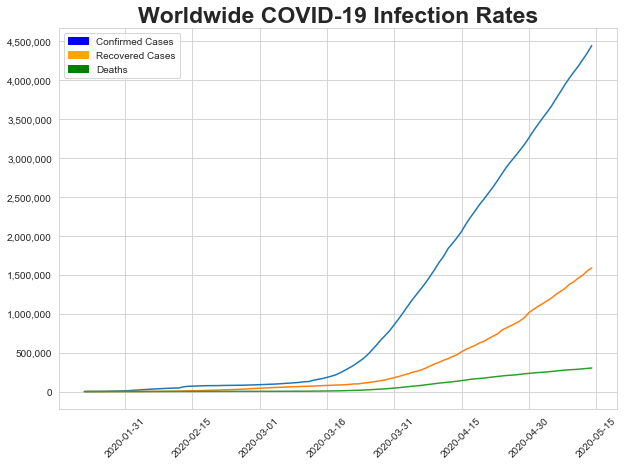

In [4]:
# simple line plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation=45)
blue = mpatches.Patch(color='blue', label='Confirmed Cases')
orange = mpatches.Patch(color='orange', label='Recovered Cases')
green = mpatches.Patch(color='green', label='Deaths')
plt.legend(handles=[blue, orange, green])
ax.plot(df_worldwide['Date'], df_worldwide['Confirmed'])
ax.plot(df_worldwide['Date'], df_worldwide['Recovered'])
ax.plot(df_worldwide['Date'], df_worldwide['Deaths'])
ax.set_title('Worldwide COVID-19 Infection Rates', fontsize=23,fontweight="bold")
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.show()


### Graph of worldwide Covid-19 cases-  log scale
The log scale helps to better visualize the rate of infection spread.  Disease spread is not linear and utilizing the log scale allows the growth rate to be analyzed to show changes in the rate of growth, not simply the amount of growth.  This is important because it can provide valuable information for decision making in response to interventions.

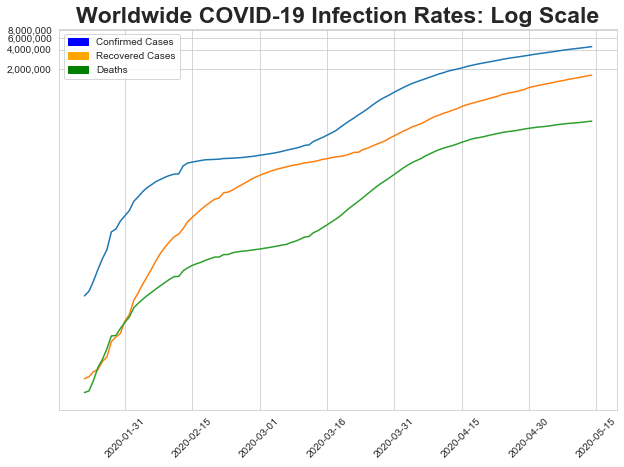

In [5]:
# simple line plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation=45)
plt.yscale('log')
blue = mpatches.Patch(color='blue', label='Confirmed Cases')
orange = mpatches.Patch(color='orange', label='Recovered Cases')
green = mpatches.Patch(color='green', label='Deaths')
plt.legend(handles=[blue, orange, green])
ax.plot(df_worldwide['Date'], df_worldwide['Confirmed'])
ax.plot(df_worldwide['Date'], df_worldwide['Recovered'])
ax.plot(df_worldwide['Date'], df_worldwide['Deaths'])
ax.set_title('Worldwide COVID-19 Infection Rates: Log Scale', fontsize=23,fontweight="bold")
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.show()


### Rate of increase in worldwide Covid-19 identified cases
The dataset included the rate of increase.  The spikes provide starting points for additional investigation. 

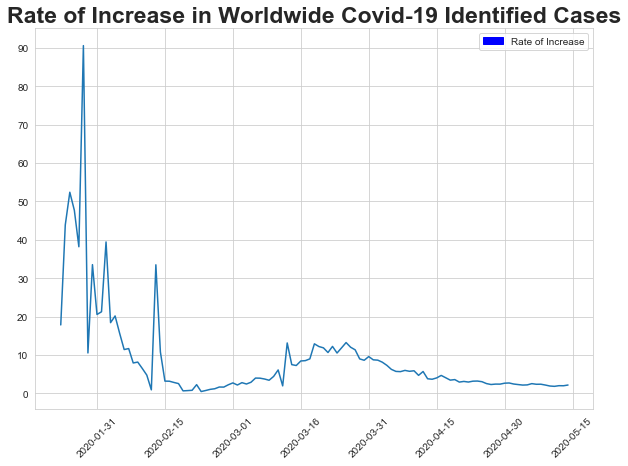

In [6]:
# simple line plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation=45)
blue = mpatches.Patch(color='blue', label='Rate of Increase')
plt.legend(handles=[blue])
ax.plot(df_worldwide['Date'], df_worldwide['Increase rate'])
ax.set_title('Rate of Increase in Worldwide Covid-19 Identified Cases', fontsize=23,fontweight="bold")
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.show()

## Key Countries
Countries with major impact on the spread of Covid-19 as identified in the data set.  These key countrys provide a good starting point for identifying potential problem areas.

In [7]:
df_key = pd.read_csv('datasets/data/key-countries-pivoted.txt')
df_key['Date'] = pd.to_datetime(df_key['Date'])

### Individual Countries
This visualization shows the number of confirmed cases by country.  The graphs each share a scale to provide a consistent comparison on the disease trajectory.

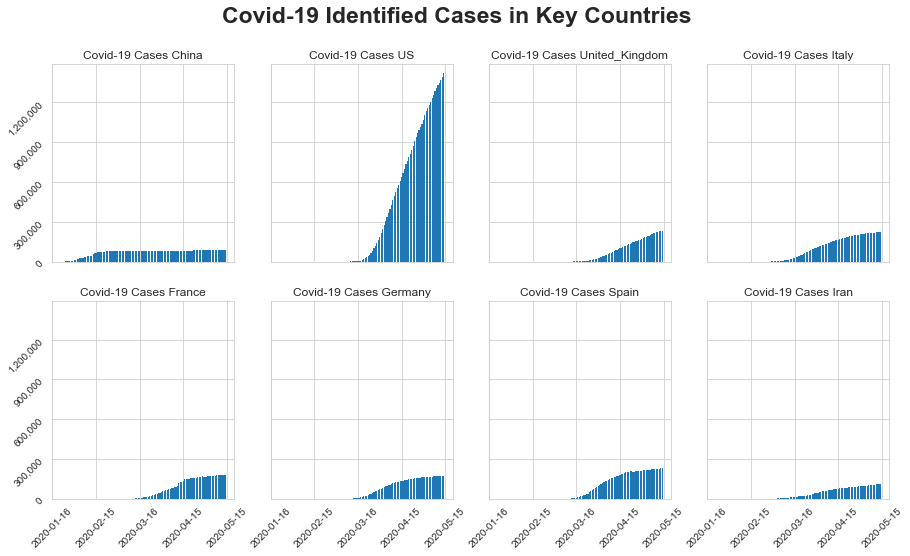

In [8]:
countries = df_key.columns[1:]
fig, ax = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)

fig.suptitle("Covid-19 Identified Cases in Key Countries", fontsize=23,fontweight="bold")
index = 0 
for x in range(2):
    for y in range(4):
        ax[x, y].bar(df_key['Date'], df_key[countries[index]], edgecolor='none')
        ax[x, y].set_title('Covid-19 Cases {}'.format(countries[index]))
        ax[x, y].yaxis.set_major_locator(plt.MaxNLocator(5))
        ax[x, y].xaxis.set_major_locator(plt.MaxNLocator(5))
        ax[x, y].set_yticklabels(['{:,}'.format(int(x)) for x in ax[x, y].get_yticks().tolist()])
        ax[x, y].tick_params(labelrotation=45)
        index += 1
plt.show()



### Combined View
Creating an overlayed graph of the key countries infection rates provides a comparison between the countries.  

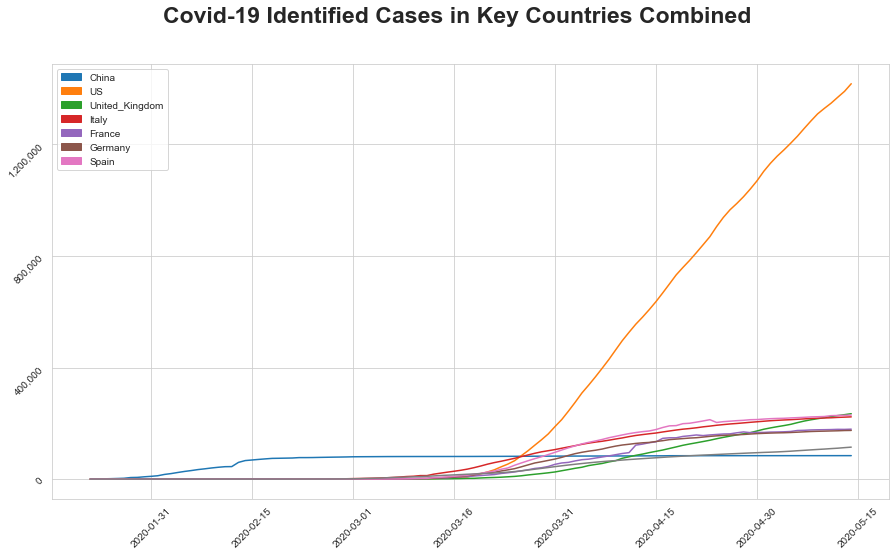

In [9]:
countries = df_key.columns[1:]
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("Covid-19 Identified Cases in Key Countries Combined", fontsize=23,fontweight="bold")
key_colors = []
for country in countries:
    ax.plot(df_key['Date'], df_key[country])
    
# gets default color order
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(len(countries) - 1):
    key_colors.append(mpatches.Patch(color=colors[i], label=countries[i]))

ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.tick_params(labelrotation=45)
plt.legend(handles=key_colors)    
plt.xticks(rotation=45)
plt.show()


## Troubling Trend in the USA
From the brief exploration the USA appears to have a disturbing upwards trend.  I considered that This trend might be an affect of the population of a country so the next step is to adjust for population in these countries. Population estimates are from [Nations Online](https://www.nationsonline.org/oneworld/population-by-country.htm).

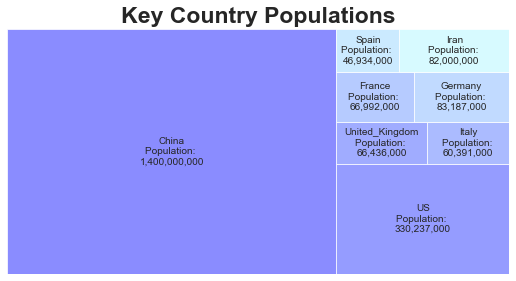

In [10]:
# ['Date', 'China', 'US', 'United_Kingdom', 'Italy', 'France', 'Germany','Spain', 'Iran']
populations = [1400000000, 330237000, 66436000, 60391000, 66992000, 83187000, 46934000, 82000000]
pop_labels =[]
pop_color_list = ['#595CFF', '#6972FF', '#7889FF', '#889FFF', '#97B5FF', '#A7CBFF', '#B6E2FF', '#C6F8FF']


# fill pop labels
for i in range(len(populations)):
    pop_labels.append( "{}\nPopulation: \n{:,}".format(countries[i], populations[i]))


# population treemap
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(9, 4.5)

plt.rc('font', size=10)
squarify.plot(sizes=populations, label=pop_labels,
              color=pop_color_list, alpha=0.7)
plt.title("Key Country Populations", fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

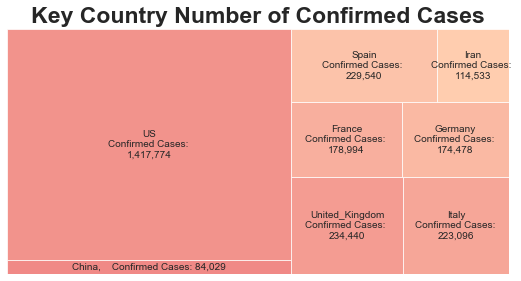

In [11]:
# get the most recent date and the cases for the most recent date
recent_date = df_key['Date'].max()
cases = df_key[df_key['Date'] == recent_date].values.tolist()[0]
cases.pop(0)

case_labels = []
case_color_list = ['#EA5753','#ED655B' ,'#F07364', '#F3816C', '#F68E75', '#F99C7D', '#FCAA86', '#FFB88E' ]
    
# fill case labels
for i in range(len(cases)):
    # deal with china runing over the line (should get the format and test, implement later if time)
    if countries[i] == 'China':
        case_labels.append( "{},    Confirmed Cases: {:,}".format(countries[i], cases[i]))       

    else:
        case_labels.append( "{}\nConfirmed Cases: \n{:,}".format(countries[i], cases[i]))

# cases Treemap
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(9, 4.5)

plt.rc('font', size=10)

squarify.plot(sizes=cases, label=case_labels,
              color=case_color_list, alpha=0.7)
plt.title("Key Country Number of Confirmed Cases", fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

### Adjusted for Population


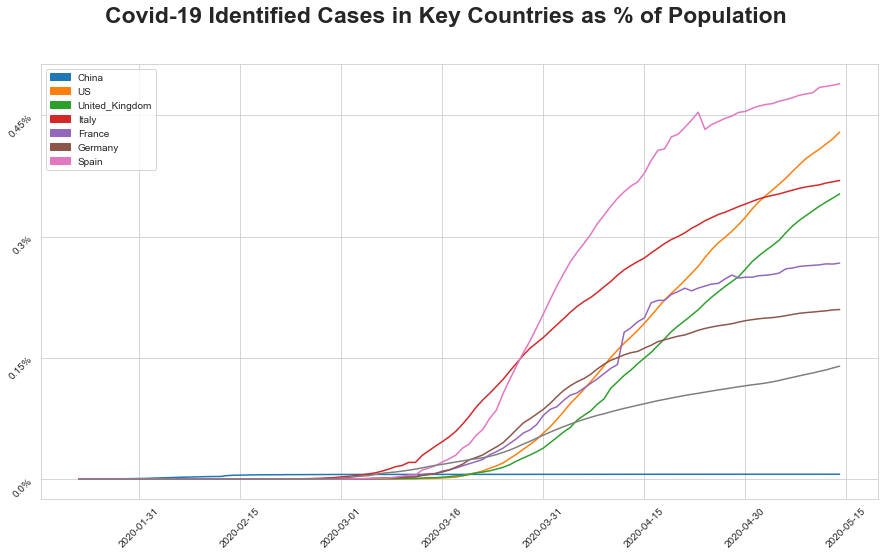

In [12]:
countries = df_key.columns[1:]
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("Covid-19 Identified Cases in Key Countries as % of Population", fontsize=23,fontweight="bold")
key_colors = []
x = 0
for country in countries:
    ax.plot(df_key['Date'], df_key[country]/populations[x])
    x += 1
    
# gets default color order
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(len(countries) - 1):
    key_colors.append(mpatches.Patch(color=colors[i], label=countries[i]))

ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_yticklabels(['{}%'.format(round(x*100, 2)) for x in ax.get_yticks().tolist()])
ax.tick_params(labelrotation=45)
plt.legend(handles=key_colors)    
plt.xticks(rotation=45)
plt.show()

## Visualizing Confirmed Cases in the USA

In [13]:
df_us_cases = pd.read_csv('datasets/data/us_confirmed.txt')
df_us_cases['Date'] = pd.to_datetime(df_us_cases['Date'])

### Plotting Geographic Location of Cases

In [14]:
start_date = df_us_cases['Date'].max()
recent_date = df_us_cases['Date'].max()
dates = df_us_cases['Date'].unique()


In [15]:
import plotly.express as px
import plotly.graph_objects as go
recent_date = df_us_cases['Date'].max()

df_date = df_us_cases[df_us_cases['Date'] == recent_date]

total_cases = df_date['Case'].sum()
fig = go.Figure(data=go.Scattergeo(lon=df_date['Long'],
                                   lat=df_date['Lat'],
                                   text=df_date['Combined_Key'] + ' Cases: ' + df_date['Case'].astype(str), 
                                   mode='markers',
                                   marker=dict(size = df_date['Case']/1000)

                ))
fig.update_layout(
        title="US Covid-19 Cases by Location: {}".format(recent_date.strftime('%b-%d-%Y')),
        geo_scope='usa'
)
fig.show()

In [16]:
# Load data frame and tidy it.
import pandas as pd

df_date = df_us_cases[df_us_cases['Date'] == recent_date]
df_state_totals = df_date.groupby(['Province/State'], as_index=False)[['Case']].sum()
state_codes = pd.read_csv('datasets/data/states.csv')

# remove the cruise lines
df_state_totals = df_state_totals[df_state_totals['Province/State'].isin(state_codes['State'])]

fig = go.Figure(data=go.Choropleth(
    locations= state_codes['Code'], # Spatial coordinates
    z = df_state_totals['Case'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Identified Cases",
))

fig.update_layout(
    title_text = 'USA Covid-19 Infection Rates by State: {}'.format(recent_date.strftime('%b-%d-%Y')),
    geo_scope='usa', # limite map scope to USA
)

fig.show()